# Benchmark Dynamic network libraries

tests on dynetx and tg lib

## TGLIB


In [1]:
import pytglib as tgl  # tglib
import scipy.stats as ss  # for Kendall's tau correlation
from tqdm import tqdm
import time
import numpy as np
import random
# from benchmark_tglib import testname as btgl

statsPath = "./stats_TGLib.txt"

statsFile = open(statsPath, 'w')
statsFile.write('')
statsFile.close()

statsFile = open(statsPath, 'a')

statsFile.close()

size_big = 10
size_smol = 10

In [2]:
inPath = './datasets/tgbl-wiki_edgelist_final.txt'
statsFile = open(statsPath, 'a')
# btgl.do_benchmark(inPath, statsPath, size_big)
pathsSize = size_big
statsFile.write(inPath)

start = time.time()
directed = True
g = tgl.load_ordered_edge_list(inPath, directed)
end = time.time()

print(f"Time taken to read graph {end-start} seconds")
statsFile.write(f"Time taken to read graph {end-start} seconds \n")

start = time.time()
stats = tgl.get_statistics(g)
end = time.time()

statsFile.write(f"Time taken to get stats {end-start} seconds")
print(f"Time taken to get stats {end-start} seconds \n")
statsFile.write(str(stats))
statsFile.write("\n")
print(stats)

start = time.time()

num_nodes = g.getNumberOfNodes()
nodes  = list(g.getNodeMap().keys())
incidents = tgl.to_incident_lists(g)

selected_from = np.random.choice(nodes, size=pathsSize)
selected_to = np.random.choice(nodes, size=pathsSize)

paths = {}
for fro in tqdm(selected_from):
    for to in (selected_to):
        temp = tgl.minimum_transition_time_path(incidents, fro, to, g.getTimeInterval())
        paths[(fro, to)] = temp


end = time.time()
print(f"Time taken to get shortest paths {end-start} seconds")
statsFile.write(f"Time taken to get shortest paths {end-start} seconds\n")
print(str(paths))
statsFile.write(str(paths))
 
start = time.time()
cc = (tgl.temporal_clustering_coefficient(incidents, g.getTimeInterval()))

end = time.time()
print(f"Time taken to get clustering coefficient {end-start} seconds")
statsFile.write(f"Time taken to get clustering coefficient {end-start} seconds\n")

statsFile.write("\n")
statsFile.write("\n")
statsFile.close()

Time taken to read graph 0.1919236183166504 seconds
Time taken to get stats 0.07442259788513184 seconds 

number of nodes: 8227
number of edges: 157474
number of static edges: 18257
number of time stamps: 152757
number of transition times: 1
min. time stamp: 0
max. time stamp: 2678373
min. transition time: 1
max. transition time: 1
min. temporal in-degree: 0
max. temporal in-degree: 1937
min. temporal out-degree: 1
max. temporal out-degree: 1603


100%|██████████| 10/10 [00:00<00:00, 146.43it/s]

Time taken to get shortest paths 0.0835886001586914 seconds
{(294, 3044): VectorTemporalEdge[], (294, 5804): VectorTemporalEdge[], (294, 7354): VectorTemporalEdge[], (294, 6202): VectorTemporalEdge[], (294, 1678): VectorTemporalEdge[], (294, 1639): VectorTemporalEdge[], (294, 3391): VectorTemporalEdge[], (294, 4117): VectorTemporalEdge[], (294, 486): VectorTemporalEdge[(294 218 41694 1), (218 210 188945 1), (210 675 484994 1), (675 145 706650 1), (145 68 749731 1), (68 963 2455199 1), (963 486 2645512 1)], (294, 7211): VectorTemporalEdge[], (6759, 3044): VectorTemporalEdge[], (6759, 5804): VectorTemporalEdge[], (6759, 7354): VectorTemporalEdge[], (6759, 6202): VectorTemporalEdge[], (6759, 1678): VectorTemporalEdge[], (6759, 1639): VectorTemporalEdge[], (6759, 3391): VectorTemporalEdge[], (6759, 4117): VectorTemporalEdge[], (6759, 486): VectorTemporalEdge[], (6759, 7211): VectorTemporalEdge[], (2881, 3044): VectorTemporalEdge[], (2881, 5804): VectorTemporalEdge[], (2881, 7354): VectorTe

In [3]:
inPath = './datasets/tgbl-wiki_edgelist_final_with_intervals.txt'
statsFile = open(statsPath, 'a')
# btgl.do_benchmark(inPath, statsPath, size_smol)

pathsSize = size_smol
statsFile.write(inPath)

start = time.time()
directed = True
g = tgl.load_ordered_edge_list(inPath, directed)
end = time.time()

print(f"Time taken to read graph {end-start} seconds")
statsFile.write(f"Time taken to read graph {end-start} seconds \n")

start = time.time()
stats = tgl.get_statistics(g)
end = time.time()

statsFile.write(f"Time taken to get stats {end-start} seconds")
print(f"Time taken to get stats {end-start} seconds \n")
statsFile.write(str(stats))
statsFile.write("\n")
print(stats)

start = time.time()

num_nodes = g.getNumberOfNodes()
nodes  = list(g.getNodeMap().keys())
incidents = tgl.to_incident_lists(g)

selected_from = np.random.choice(nodes, size=pathsSize)
selected_to = np.random.choice(nodes, size=pathsSize)

paths = {}

for fro in tqdm(selected_from):
    for to in (selected_to):
        temp = tgl.minimum_transition_time_path(incidents, fro, to, g.getTimeInterval())
        paths[(fro, to)] = temp

end = time.time()
print(f"Time taken to get shortest paths {end-start} seconds")
statsFile.write(f"Time taken to get shortest paths {end-start} seconds\n")

start = time.time()
cc = (tgl.temporal_clustering_coefficient(incidents, g.getTimeInterval()))

end = time.time()
print(f"Time taken to get clustering coefficient {end-start} seconds")
statsFile.write(f"Time taken to get clustering coefficient {end-start} seconds\n")

statsFile.write("\n")
statsFile.write("\n")
statsFile.close()

Time taken to read graph 0.18692803382873535 seconds
Time taken to get stats 0.11372804641723633 seconds 

number of nodes: 8227
number of edges: 157474
number of static edges: 18257
number of time stamps: 152757
number of transition times: 152757
min. time stamp: 0
max. time stamp: 2678373
min. transition time: 1000
max. transition time: 2679373
min. temporal in-degree: 0
max. temporal in-degree: 1937
min. temporal out-degree: 1
max. temporal out-degree: 1603


100%|██████████| 10/10 [00:00<00:00, 2503.61it/s]

Time taken to get shortest paths 0.016707658767700195 seconds
Time taken to get clustering coefficient 0.017782926559448242 seconds


In [4]:
inPath = './datasets/tgbl-review_edgelist_final.txt'
statsFile = open(statsPath, 'a')
# btgl.do_benchmark(inPath, statsPath, size_big)

pathsSize = size_big


start = time.time()
directed = True
g = tgl.load_ordered_edge_list(inPath, directed)
end = time.time()

print(f"Time taken to read graph {end-start} seconds")
statsFile.write(f"Time taken to read graph {end-start} seconds \n")

start = time.time()
stats = tgl.get_statistics(g)
end = time.time()

statsFile.write(f"Time taken to get stats {end-start} seconds")
print(f"Time taken to get stats {end-start} seconds \n")
statsFile.write(str(stats))
statsFile.write("\n")
print(stats)

start = time.time()

num_nodes = g.getNumberOfNodes()
nodes  = list(g.getNodeMap().keys())
incidents = tgl.to_incident_lists(g)

selected_from = np.random.choice(nodes, size=pathsSize)
selected_to = np.random.choice(nodes, size=pathsSize) #nodes

paths = {}
for fro in tqdm(selected_from):
    for to in (selected_to):
        temp = tgl.minimum_transition_time_path(incidents, fro, to, g.getTimeInterval())
        paths[(fro, to)] = temp


end = time.time()
print(f"Time taken to get shortest paths {end-start} seconds")
statsFile.write(f"Time taken to get shortest paths {end-start} seconds\n")

start = time.time()
cc = (tgl.temporal_clustering_coefficient(incidents, g.getTimeInterval()))

end = time.time()
print(f"Time taken to get clustering coefficient {end-start} seconds")
statsFile.write(f"Time taken to get clustering coefficient {end-start} seconds\n")

statsFile.write("\n")
statsFile.write("\n")
statsFile.close()

Time taken to read graph 7.39859938621521 seconds
Time taken to get stats 4.300540208816528 seconds 

number of nodes: 352637
number of edges: 4873540
number of static edges: 4730223
number of time stamps: 6865
number of transition times: 1
min. time stamp: 929232000
max. time stamp: 1538611200
min. transition time: 1
max. transition time: 1
min. temporal in-degree: 0
max. temporal in-degree: 6129
min. temporal out-degree: 0
max. temporal out-degree: 627


100%|██████████| 10/10 [00:47<00:00,  4.76s/it]

Time taken to get shortest paths 48.18176007270813 seconds
Time taken to get clustering coefficient 9.801138639450073 seconds


In [5]:
# inPath = './datasets/tgbl-review_edgelist_final_with_intervals.txt'
# btgl.do_benchmark(inPath, statsPath, size_smol)

pathsSize = size_smol

statsFile = open(statsPath, 'a')

start = time.time()
directed = True
g = tgl.load_ordered_edge_list(inPath, directed)
end = time.time()

print(f"Time taken to read graph {end-start} seconds")
statsFile.write(f"Time taken to read graph {end-start} seconds \n")

start = time.time()
stats = tgl.get_statistics(g)
end = time.time()

statsFile.write(f"Time taken to get stats {end-start} seconds")
print(f"Time taken to get stats {end-start} seconds \n")
statsFile.write(str(stats))
statsFile.write("\n")
print(stats)

start = time.time()

num_nodes = g.getNumberOfNodes()
nodes  = list(g.getNodeMap().keys())
incidents = tgl.to_incident_lists(g)

selected_from = np.random.choice(nodes, size=pathsSize)
selected_to = np.random.choice(nodes, size=pathsSize)

paths = {}
for fro in tqdm(selected_from):
    for to in (selected_to):
        temp = tgl.minimum_transition_time_path(incidents, fro, to, g.getTimeInterval())
        paths[(fro, to)] = temp


end = time.time()
print(f"Time taken to get shortest paths {end-start} seconds")
statsFile.write(f"Time taken to get shortest paths {end-start} seconds\n")

start = time.time()
cc = (tgl.temporal_clustering_coefficient(incidents, g.getTimeInterval()))

end = time.time()
print(f"Time taken to get clustering coefficient {end-start} seconds")
statsFile.write(f"Time taken to get clustering coefficient {end-start} seconds\n")


statsFile.write("\n")
statsFile.write("\n")
statsFile.close()

Time taken to read graph 7.462098598480225 seconds
Time taken to get stats 4.573336362838745 seconds 

number of nodes: 352637
number of edges: 4873540
number of static edges: 4730223
number of time stamps: 6865
number of transition times: 1
min. time stamp: 929232000
max. time stamp: 1538611200
min. transition time: 1
max. transition time: 1
min. temporal in-degree: 0
max. temporal in-degree: 6129
min. temporal out-degree: 0
max. temporal out-degree: 627


100%|██████████| 10/10 [00:56<00:00,  5.62s/it]


Time taken to get shortest paths 56.9165518283844 seconds
Time taken to get clustering coefficient 9.743409156799316 seconds


## DynetX

In [6]:
from tqdm import tqdm
import numpy as np

import dynetx.dynetx as dn
import dynetx.dynetx.algorithms as al
import time
import functools 
from  benchmark_DyNetX import BenchmarkDyNetX as bdyn

statsPath = "./stats_DyNetX.txt"

statsFile = open(statsPath, 'w')
statsFile.write('')
statsFile.close()

statsFile = open(statsPath, 'a')

statsFile.close()



In [7]:
inPath = './datasets/tgbl-wiki_edgelist_final.txt'
bdyn.do_benchmark(inPath, statsPath, size_big)

Time taken to read graph 1.677725076675415 seconds
Time taken to get stats 0.04060053825378418 seconds
===========stats===========
num_Nodes:  8227
num_edges:  18257
number of interactions:  2633
number of timestamps:  152757
min. timestamps:  0
max. timestamps:  2678373
min in degree:  0
max in degree:  256
min out degree:  1
max out degree:  454
Time taken to get clustering coefficient 0.8006689548492432 seconds


100%|██████████| 10/10 [01:43<00:00, 10.37s/it]

Time taken to get and annotate 410 paths 103.74891948699951 seconds or 0:1:43.74891948699951


In [8]:
# inPath = './datasets/tgbl-wiki_edgelist_final_with_intervals.txt'
# bdyn.do_benchmark(inPath, statsPath, size_smol)

In [9]:
inPath = './datasets/tgbl-review_edgelist_final.txt'
bdyn.do_benchmark(inPath, statsPath, size_big)

Time taken to read graph 55.58260989189148 seconds
Time taken to get stats 3.7655632495880127 seconds
===========stats===========
num_Nodes:  352637
num_edges:  4730223
number of interactions:  1804961
number of timestamps:  6865
min. timestamps:  929232000
max. timestamps:  1538611200
min in degree:  0
max in degree:  6082
min out degree:  0
max out degree:  592


IndexError: list index out of range

In [ ]:
# inPath = './datasets/tgbl-review_edgelist_final_with_intervals.txt'
# bdyn.do_benchmark(inPath, statsPath, size_smol)

In [1]:
# results 
from math import sqrt
import matplotlib.pylab as plt
import numpy as np

data_sets = ['tgbl-wiki', 'tgbl-wiki_with_intervals', 'tgbl-review', 'tgbl-review_with_intervals']
dynetX_load_times = [1.62,43.29,63.29,0]
dynetX_get_stats_times = [0.05, 0.21, 4.52,0]

tglib_load_times = [0.22, 0.17, 7.45, 7.49]
tglib_det_stats_times = [0.07,0.11,4.39,4.55]



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


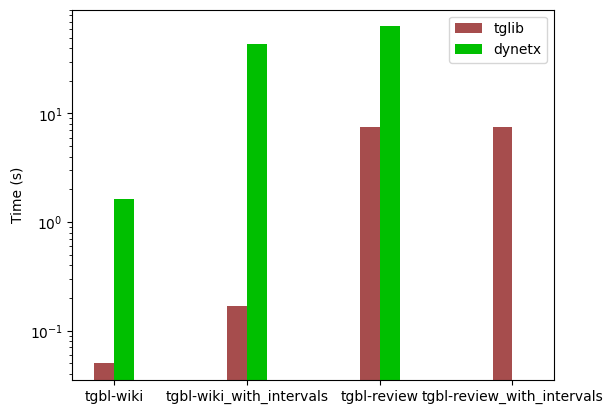

In [2]:
load_time_results = {'tglib': {
    'tgbl-wiki': 0.05,
    'tgbl-wiki_with_intervals': 0.17,
    'tgbl-review': 7.45,
    'tgbl-review_with_intervals': 7.49
    },
    'dynetx': {
    'tgbl-wiki': 1.62,
    'tgbl-wiki_with_intervals': 43.29,
    'tgbl-review': 63.29,
    'tgbl-review_with_intervals': 0
    }
}
memory_results = load_time_results
structs = ['tglib', 'dynetx']
datasets = data_sets

# for struct in structs:
#     for dataset_name in datasets:
#         memory_results.setdefault(struct, {})[dataset_name] = pickle.load(open(f'memory_results_{struct}_{dataset_name}.pkl', 'rb'))

fig, ax = plt.subplots()
width = 0.15
offset = {'tglib': -0.5 * width, 'dynetx': 0.5* width} # {'interval': 2 * width, 'snapshot': 1 * width, 'adjtree': 0 * width, 'tvg': -1 * width,'networkx': -2 * width}
color = {'tglib': (0.65, 0.3, 0.3), 'dynetx': (0, 0.75, 0)}  # {'interval': (0.65, 0.3, 0.3), 'snapshot': (0, 0.75, 0), 'networkx': (0.8, 0.8, 0.8), 'adjtree': (0, 0, .75), 'tvg': (1, 1, 0)}
labels = {'tglib': 'tglib', 'dynetx': 'dynetx'} # {'interval': 'IntervalGraph', 'snapshot': 'SnapshotGraph', 'networkx': 'NetworkX', 'adjtree': 'AdjTree', 'tvg': 'TVG'}
label_location = np.arange(len(datasets))

for struct in structs:
    nums = [memory_results[struct][d] for d in memory_results[struct]]
    ax.bar(label_location + offset[struct], nums, width, label=labels[struct], color=color[struct])

# ax.set_title('Memory')
ax.set_xticks(label_location)
ax.set_xticklabels(datasets)
ax.set_yscale('log')
ax.set_ylabel('Time (s)')
fig.tight_layout()
fig.set_figheight(4)
fig.set_figwidth(6)
plt.tight_layout(pad=0.2)
plt.legend()
fig.savefig('load time.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


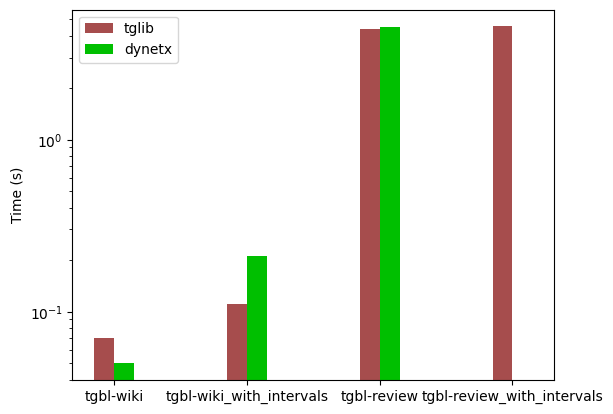

In [3]:
dynetX_get_stats_times = [0.05, 0.21, 4.52,0]
tglib_det_stats_times = [0.07,0.11,4.39,4.55]

stats_time_results = {'tglib': {
    'tgbl-wiki': 0.07,
    'tgbl-wiki_with_intervals': 0.11,
    'tgbl-review': 4.39,
    'tgbl-review_with_intervals': 4.55
    },
    'dynetx': {
    'tgbl-wiki': 0.05,
    'tgbl-wiki_with_intervals': 0.21,
    'tgbl-review': 4.52,
    'tgbl-review_with_intervals': 0
    }
}
memory_results = stats_time_results
structs = ['tglib', 'dynetx']
datasets = data_sets

# for struct in structs:
#     for dataset_name in datasets:
#         memory_results.setdefault(struct, {})[dataset_name] = pickle.load(open(f'memory_results_{struct}_{dataset_name}.pkl', 'rb'))

fig, ax = plt.subplots()
width = 0.15
offset = {'tglib': -0.5 * width, 'dynetx': 0.5* width} # {'interval': 2 * width, 'snapshot': 1 * width, 'adjtree': 0 * width, 'tvg': -1 * width,'networkx': -2 * width}
color = {'tglib': (0.65, 0.3, 0.3), 'dynetx': (0, 0.75, 0)}  # {'interval': (0.65, 0.3, 0.3), 'snapshot': (0, 0.75, 0), 'networkx': (0.8, 0.8, 0.8), 'adjtree': (0, 0, .75), 'tvg': (1, 1, 0)}
labels = {'tglib': 'tglib', 'dynetx': 'dynetx'} # {'interval': 'IntervalGraph', 'snapshot': 'SnapshotGraph', 'networkx': 'NetworkX', 'adjtree': 'AdjTree', 'tvg': 'TVG'}
label_location = np.arange(len(datasets))

for struct in structs:
    nums = [memory_results[struct][d] for d in memory_results[struct]]
    ax.bar(label_location + offset[struct], nums, width, label=labels[struct], color=color[struct])

# ax.set_title('Memory')
ax.set_xticks(label_location)
ax.set_xticklabels(datasets)
ax.set_yscale('log')
ax.set_ylabel('Time (s)')
fig.tight_layout()
fig.set_figheight(4)
fig.set_figwidth(6)
plt.tight_layout(pad=0.2)
plt.legend()
fig.savefig('stats time.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


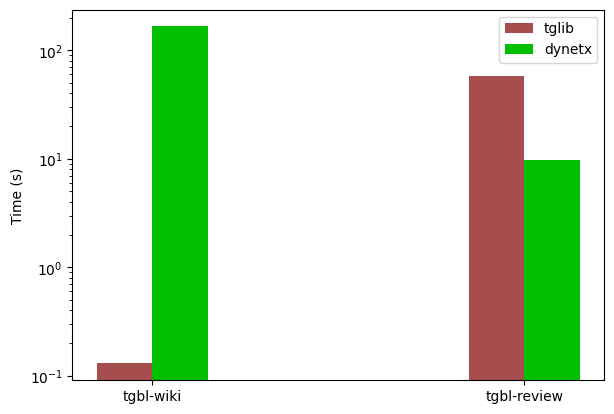

In [4]:

data_sets = ['tgbl-wiki',  'tgbl-review']
path_time_results = {'tglib': {
    'tgbl-wiki': 0.13,
    'tgbl-review': 57.66,
    },
    'dynetx': {
    'tgbl-wiki': 166.12,
    'tgbl-review': 9.79,
    }
}
memory_results = path_time_results
structs = ['tglib', 'dynetx']
datasets = data_sets

# for struct in structs:
#     for dataset_name in datasets:
#         memory_results.setdefault(struct, {})[dataset_name] = pickle.load(open(f'memory_results_{struct}_{dataset_name}.pkl', 'rb'))

fig, ax = plt.subplots()
width = 0.15
offset = {'tglib': -0.5 * width, 'dynetx': 0.5* width} # {'interval': 2 * width, 'snapshot': 1 * width, 'adjtree': 0 * width, 'tvg': -1 * width,'networkx': -2 * width}
color = {'tglib': (0.65, 0.3, 0.3), 'dynetx': (0, 0.75, 0)}  # {'interval': (0.65, 0.3, 0.3), 'snapshot': (0, 0.75, 0), 'networkx': (0.8, 0.8, 0.8), 'adjtree': (0, 0, .75), 'tvg': (1, 1, 0)}
labels = {'tglib': 'tglib', 'dynetx': 'dynetx'} # {'interval': 'IntervalGraph', 'snapshot': 'SnapshotGraph', 'networkx': 'NetworkX', 'adjtree': 'AdjTree', 'tvg': 'TVG'}
label_location = np.arange(len(datasets))

for struct in structs:
    nums = [memory_results[struct][d] for d in memory_results[struct]]
    ax.bar(label_location + offset[struct], nums, width, label=labels[struct], color=color[struct])

# ax.set_title('Memory')
ax.set_xticks(label_location)
ax.set_xticklabels(datasets)
ax.set_yscale('log')
ax.set_ylabel('Time (s)')
fig.tight_layout()
fig.set_figheight(4)
fig.set_figwidth(6)
plt.tight_layout(pad=0.2)
plt.legend()
fig.savefig('load time.eps', format='eps')
plt.show()